In [2]:
from google.colab import files
uploaded = files.upload()

Saving cancer_data.csv to cancer_data.csv


In [3]:
import pandas as pd

#Reading the data set using pandas
df = pd.read_csv('cancer_data.csv')
df.head()

,Patient_ID,Age,Gender,Cancer_Type,Stage,Diagnosis_Date,Treatment_Type,Treatment_Start_Date,Treatment_End_Date,Tumor_Size_cm,...,Smoking_Status,Alcohol_Consumption,BMI,Comorbidities,Family_History,Survival_Months,Relapse,Occupation,Income_Level,Followup_Date
0,1,69,Male,Leukemia,III,6/26/2015,Radiation,11/19/2015,4/24/2020,9.53,...,Current,NaN,19.4,Multiple,Yes,83,No,Office Worker,Low,12/13/2022
1,2,41,Male,Lung,I,3/5/2016,Hormone Therapy,7/1/2022,12/16/2023,6.68,...,Never,Moderate,26.6,Multiple,No,108,Yes,Healthcare,High,8/15/2024
2,3,47,Female,Prostate,II,9/17/2017,Radiation,5/9/2022,6/10/2023,2.52,...,Never,Moderate,26.2,NaN,No,108,No,Retired,Medium,6/16/2024
3,4,66,Male,Skin,I,3/7/2018,Immunotherapy,2/19/2019,6/3/2020,5.49,...,Current,Heavy,15.4,Hypertension,Yes,108,Yes,Office Worker,High,4/27/2024
4,5,72,Male,Breast,II,11/9/2019,Chemotherapy,11/17/2019,3/16/2023,9.84,...,Former,Heavy,19.2,Hypertension,Yes,39,No,Manual Labor,Low,5/22/2023


In [4]:
df.isnull().sum()

,0
Patient_ID,0
Age,0
Gender,0
Cancer_Type,0
Stage,0
Diagnosis_Date,0
Treatment_Type,0
Treatment_Start_Date,0
Treatment_End_Date,0
Tumor_Size_cm,0


In [5]:
#Replacing missing values or values that are None as None
df['Genetic_Mutation'] = df['Genetic_Mutation'].fillna('None')
df['Alcohol_Consumption'] = df['Alcohol_Consumption'].fillna('None')
df['Comorbidities'] = df['Comorbidities'].fillna('None')

In [6]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# Binary encoding
df['Gender'] = le.fit_transform(df['Gender'])       # Male=1, Female=0
df['Metastasis'] = le.fit_transform(df['Metastasis'])  # Yes=1, No=0
df['Family_History'] = le.fit_transform(df['Family_History'])  # Yes=1, No=0
df['Relapse'] = le.fit_transform(df['Relapse'])  # Yes=1, No=0

# Ordinal encoding manually for Income (if Low < Medium < High)
income_map = {'Low': 0, 'Medium': 1, 'High': 2}
df['Income_Level'] = df['Income_Level'].map(income_map)

 # manual encoding for Stage (in the order of I < II < III < IV)
stage_map = {'I': 0, 'II': 1, 'III': 2, 'IV': 3}
df['Stage'] = df['Stage'].map(stage_map)

# manual encoding for Alcohol_Consumption (in the order of None < Moderate < High)
consumption_map = {'None': 0, 'Moderate': 1, 'Heavy': 2}
df['Alcohol_Consumption'] = df['Alcohol_Consumption'].map(consumption_map)

df['Cancer_Type'] = le.fit_transform(df['Cancer_Type'])

# Save the mapping so you can decode the labels later (e.g., for reporting)
cancer_class_map = dict(zip(le.classes_, le.transform(le.classes_)))
print("Target class map:", cancer_class_map)

# One-hot encode nominal input features (excluding target!)
df = pd.get_dummies(df, columns=[
    'Treatment_Type',
    'Smoking_Status',
    'Comorbidities',
    'Occupation',
    'Genetic_Mutation'
], drop_first=True)

df.head()

Target class map: {'Breast': np.int64(0), 'Colon': np.int64(1), 'Leukemia': np.int64(2), 'Lung': np.int64(3), 'Prostate': np.int64(4), 'Skin': np.int64(5)}


,Patient_ID,Age,Gender,Cancer_Type,Stage,Diagnosis_Date,Treatment_Start_Date,Treatment_End_Date,Tumor_Size_cm,Lymph_Nodes_Examined,...,Comorbidities_Hypertension,Comorbidities_Multiple,Comorbidities_None,Occupation_Manual Labor,Occupation_Office Worker,Occupation_Retired,Occupation_Unemployed,Genetic_Mutation_BRCA2,Genetic_Mutation_None,Genetic_Mutation_TP53
0,1,69,1,2,2,6/26/2015,11/19/2015,4/24/2020,9.53,10,...,False,True,False,False,True,False,False,True,False,False
1,2,41,1,3,0,3/5/2016,7/1/2022,12/16/2023,6.68,1,...,False,True,False,False,False,False,False,False,True,False
2,3,47,0,4,1,9/17/2017,5/9/2022,6/10/2023,2.52,0,...,False,False,True,False,False,True,False,False,False,False
3,4,66,1,5,0,3/7/2018,2/19/2019,6/3/2020,5.49,9,...,True,False,False,False,True,False,False,False,False,True
4,5,72,1,0,1,11/9/2019,11/17/2019,3/16/2023,9.84,2,...,True,False,False,True,False,False,False,False,False,True


In [7]:
from sklearn.preprocessing import StandardScaler

# Select numeric columns to scale
numeric_cols = ['Tumor_Size_cm', 'BMI', 'Lymph_Nodes_Examined', 'Lymph_Nodes_Positive', 'Survival_Months']
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

In [8]:
df['Diagnosis_Date'] = pd.to_datetime(df['Diagnosis_Date'])
df['Treatment_Start_Date'] = pd.to_datetime(df['Treatment_Start_Date'])
df['Treatment_End_Date'] = pd.to_datetime(df['Treatment_End_Date'])

df['Days_to_Treatment'] = (df['Treatment_Start_Date'] - df['Diagnosis_Date']).dt.days
df['Treatment_Duration'] = (df['Treatment_End_Date'] - df['Treatment_Start_Date']).dt.days

df.drop(columns=['Diagnosis_Date', 'Treatment_Start_Date', 'Treatment_End_Date', 'Followup_Date'], inplace=True)

In [9]:
# Scale only the new duration columns
date_duration_cols = ['Days_to_Treatment', 'Treatment_Duration']

scaler_dates = StandardScaler()
df[date_duration_cols] = scaler_dates.fit_transform(df[date_duration_cols])
df.head()

,Patient_ID,Age,Gender,Cancer_Type,Stage,Tumor_Size_cm,Lymph_Nodes_Examined,Lymph_Nodes_Positive,Metastasis,Alcohol_Consumption,...,Comorbidities_None,Occupation_Manual Labor,Occupation_Office Worker,Occupation_Retired,Occupation_Unemployed,Genetic_Mutation_BRCA2,Genetic_Mutation_None,Genetic_Mutation_TP53,Days_to_Treatment,Treatment_Duration
0,1,69,1,2,2,1.584049,0.072124,0.477952,1,0,...,False,False,True,False,False,True,False,False,-0.928967,2.122762
1,2,41,1,3,0,0.535569,-1.487010,-0.835303,1,1,...,False,False,False,False,False,False,True,False,1.776149,0.138565
2,3,47,0,4,1,-0.994845,-1.660247,-1.054179,0,1,...,True,False,False,True,False,False,False,False,1.008261,-0.110146
3,4,66,1,5,0,0.097782,-0.101113,-0.616427,1,2,...,False,False,True,False,False,False,False,True,-0.675089,0.023353
4,5,72,1,0,1,1.698095,-1.313773,-1.054179,0,2,...,False,True,False,False,False,False,False,True,-1.101554,1.385774


In [10]:
# Confirm all columns are numeric
non_numeric_cols = df.select_dtypes(include=['object']).columns
print("Non-numeric columns still present:", non_numeric_cols)

# Drop or encode them if needed
df = df.drop(columns=non_numeric_cols)

Non-numeric columns still present: Index([], dtype='object')


In [11]:
from sklearn.model_selection import train_test_split

X = df.drop('Cancer_Type', axis=1)
y = df['Cancer_Type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

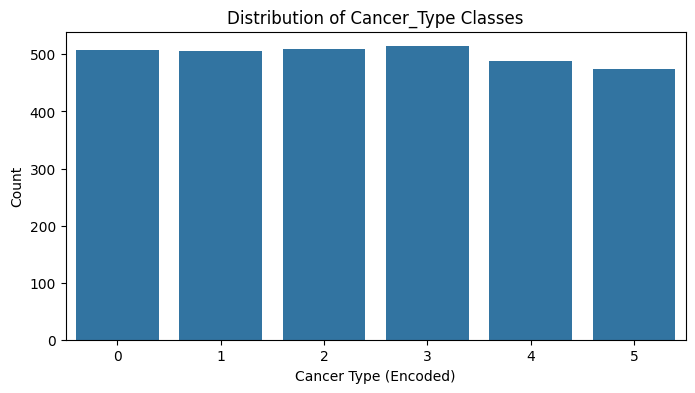

,count
Cancer_Type,
3,514
2,510
0,507
1,506
4,488
5,475


In [12]:
# Check distribution of target classes to see if the classes are imbalanced sometimes it may result different when the models are applied
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
sns.countplot(x='Cancer_Type', data=df)
plt.title("Distribution of Cancer_Type Classes")
plt.xlabel("Cancer Type (Encoded)")
plt.ylabel("Count")
plt.show()

# Or see raw value counts
df['Cancer_Type'].value_counts()

In [14]:
# Support Vector Machine (SVM) Implementation
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

svm_model = SVC(kernel='rbf')  # 'linear' and 'poly' are also possible
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

print("SVM Classification Report:")
print(classification_report(y_test, y_pred_svm))

SVM Classification Report:
              precision    recall  f1-score   support

           0       0.18      0.39      0.25       101
           1       0.00      0.00      0.00       101
           2       0.00      0.00      0.00       102
           3       0.16      0.41      0.23       103
           4       0.11      0.13      0.12        98
           5       0.00      0.00      0.00        95

    accuracy                           0.16       600
   macro avg       0.07      0.15      0.10       600
weighted avg       0.08      0.16      0.10       600



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [15]:
# Naive Bayes Implementation
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)

print("Naive Bayes Classification Report:")
print(classification_report(y_test, y_pred_nb))

Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.20      0.14      0.16       101
           1       0.16      0.12      0.14       101
           2       0.15      0.17      0.16       102
           3       0.12      0.13      0.12       103
           4       0.16      0.18      0.17        98
           5       0.13      0.16      0.14        95

    accuracy                           0.15       600
   macro avg       0.15      0.15      0.15       600
weighted avg       0.15      0.15      0.15       600



In [19]:
# Deep Neural Network Implementation
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# One-hot encode labels
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

dnn_model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),
    Dense(32, activation='relu'),
    Dense(y_train_cat.shape[1], activation='softmax')
])

dnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train
history = dnn_model.fit(X_train, y_train_cat, epochs=1000, validation_data=(X_test, y_test_cat))

Epoch 1/1000


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.1699 - loss: 116.4117 - val_accuracy: 0.1733 - val_loss: 3.4219
Epoch 2/1000
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1694 - loss: 2.7160 - val_accuracy: 0.1750 - val_loss: 2.3397
Epoch 3/1000
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1629 - loss: 2.1501 - val_accuracy: 0.1667 - val_loss: 2.1401
Epoch 4/1000
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1793 - loss: 2.2888 - val_accuracy: 0.1533 - val_loss: 2.3822
Epoch 5/1000
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1885 - loss: 2.9489 - val_accuracy: 0.1633 - val_loss: 2.1302
Epoch 6/1000
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1715 - loss: 2.5649 - val_accuracy: 0.1417 - val_loss: 2.1960
Epoch 7/1000
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1689 - loss: 2.2243 - val_accuracy: 0.1533 - val_loss: 3.3640
Epoch 8/1000
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1791 - loss: 2.5346 - val_accuracy: 0.1633 - val_

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


DNN Test Accuracy: 0.1583


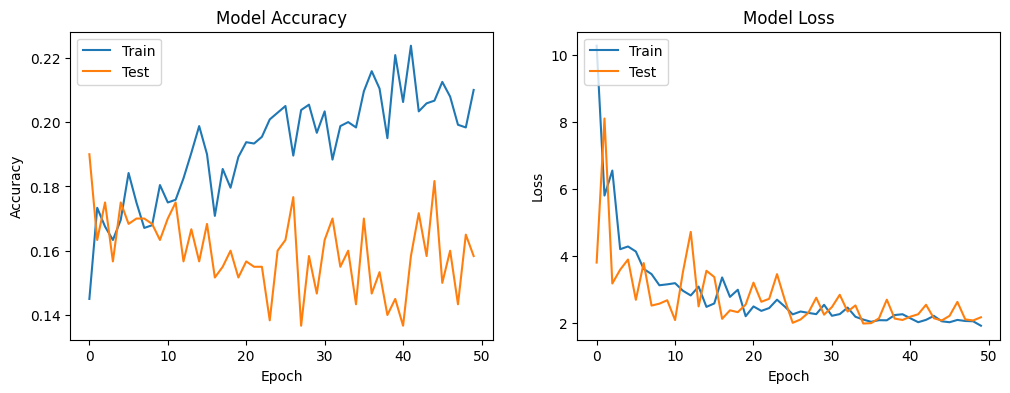

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
DNN Classification Report:
              precision    recall  f1-score   support

           0       0.17      0.62      0.27       101
           1       0.00      0.00      0.00       101
           2       0.00      0.00      0.00       102
           3       0.15      0.07      0.09       103
           4       0.25      0.02      0.04        98
           5       0.13      0.24      0.17        95

    accuracy                           0.16       600
   macro avg       0.12      0.16      0.10       600
weighted avg       0.12      0.16      0.09       600



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


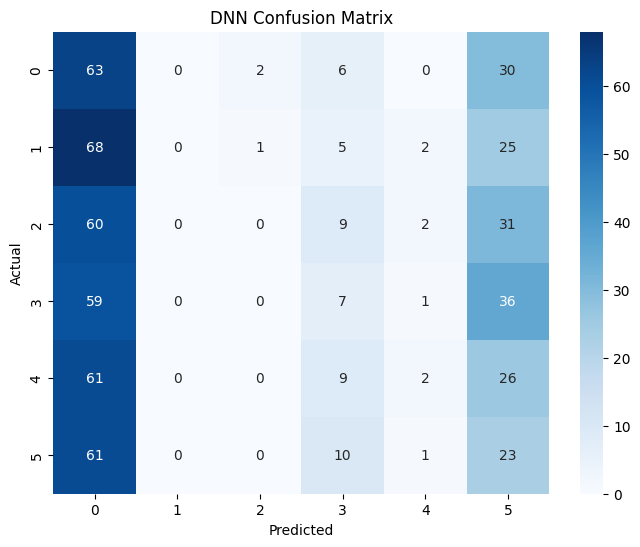

In [20]:
# Increase complexity of the DNN model
dnn_model = Sequential([
    Dense(128, input_dim=X_train.shape[1], activation='relu'), # Increased neurons
    Dense(64, activation='relu'), # Added another layer
    Dense(32, activation='relu'),
    Dense(y_train_cat.shape[1], activation='softmax')
])

dnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train with more epochs
history = dnn_model.fit(X_train, y_train_cat, epochs=50, # Increased epochs
                        validation_data=(X_test, y_test_cat),
                        verbose=0) # Suppress verbose output during training

# Evaluate the model
loss, accuracy = dnn_model.evaluate(X_test, y_test_cat, verbose=0)
print(f'DNN Test Accuracy: {accuracy:.4f}')

# Plot training history to diagnose
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Get predictions for classification report
y_pred_dnn_probs = dnn_model.predict(X_test)
y_pred_dnn = tf.argmax(y_pred_dnn_probs, axis=1)

print("DNN Classification Report:")
print(classification_report(y_test, y_pred_dnn))

# Confusion Matrix for DNN
cm_dnn = confusion_matrix(y_test, y_pred_dnn)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_dnn, annot=True, fmt='d', cmap='Blues')
plt.title('DNN Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

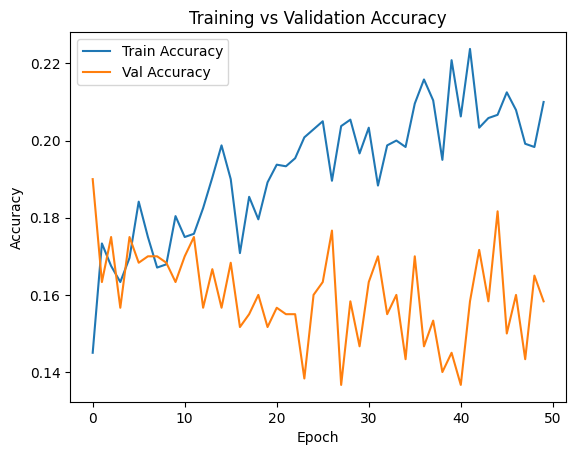

In [21]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


--- Performance Metrics for SVM ---
Accuracy:  0.1567
Precision: 0.0749
Recall:    0.1544
F1 Score:  0.0990

Confusion Matrix:


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


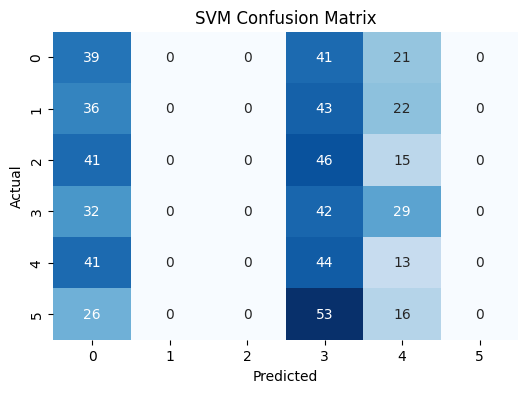


--- Performance Metrics for Naive Bayes ---
Accuracy:  0.1483
Precision: 0.1521
Recall:    0.1486
F1 Score:  0.1484

Confusion Matrix:


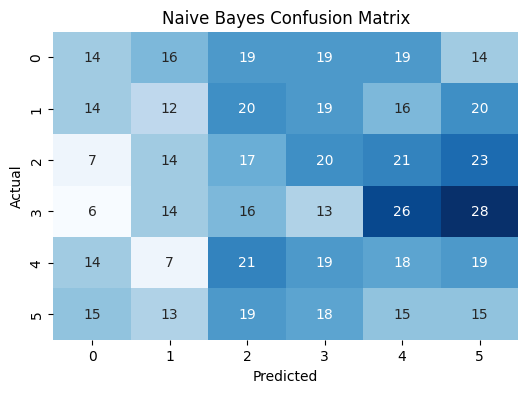


--- Performance Metrics for DNN ---
Accuracy:  0.1583
Precision: 0.1177
Recall:    0.1590
F1 Score:  0.0952

Confusion Matrix:


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


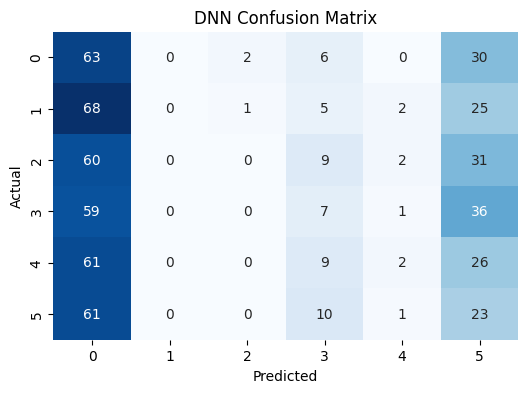

In [24]:
# print("Accuracy:", accuracy_score(y_test, y_pred_svm))
# print("Precision:", precision_score(y_test, y_pred_svm, average='macro'))
# print("Recall:", recall_score(y_test, y_pred_svm, average='macro'))
# print("F1 Score:", f1_score(y_test, y_pred_svm, average='macro'))
# print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))
#  do this in a creative way

def print_classification_metrics(model_name, y_true, y_pred):
  """Prints key classification metrics in a formatted way."""
  print(f"\n--- Performance Metrics for {model_name} ---")
  print(f"Accuracy:  {accuracy_score(y_true, y_pred):.4f}")
  print(f"Precision: {precision_score(y_true, y_pred, average='macro'):.4f}")
  print(f"Recall:    {recall_score(y_true, y_pred, average='macro'):.4f}")
  print(f"F1 Score:  {f1_score(y_true, y_pred, average='macro'):.4f}")

  print("\nConfusion Matrix:")
  cm = confusion_matrix(y_true, y_pred)
  # Use seaborn to visualize the confusion matrix
  plt.figure(figsize=(6, 4))
  sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
  plt.title(f'{model_name} Confusion Matrix')
  plt.xlabel('Predicted')
  plt.ylabel('Actual')
  plt.show()

# Call the function for each model
print_classification_metrics("SVM", y_test, y_pred_svm)
print_classification_metrics("Naive Bayes", y_test, y_pred_nb)
print_classification_metrics("DNN", y_test, y_pred_dnn)
